# PM
- 항공기 엔진 고장 시점 및 일정 기간내 고장발생 여부 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 데이터

* 훈련데이터
[download trianing data](http://azuremlsamples.azureml.net/templatedata/PM_train.txt)  
* 테스트 데이터
[download test data](http://azuremlsamples.azureml.net/templatedata/PM_test.txt)  
* 정답 데이터
[download truth data](http://azuremlsamples.azureml.net/templatedata/PM_truth.txt)  

[보고서](https://www.dropbox.com/s/9bfvx1d13o5wyqy/Predictive%20Maintenance%20Project%20Report.pdf)

In [20]:
path1 = 'http://azuremlsamples.azureml.net/templatedata/PM_train.txt'

In [21]:
path2 = 'http://azuremlsamples.azureml.net/templatedata/PM_test.txt'

In [22]:
path3 = 'http://azuremlsamples.azureml.net/templatedata/PM_truth.txt'

- 설명

•	__id__: is the engine ID, ranging from 1 to 100  
•	__cycle__: per engine sequence, starts from 1 to the cycle number where failure had happened (trining data only)  
•	__setting1__ to __setting3__: engine operational settings  
•	__s1__ to __s21__: sensors measurements  


In [23]:
# 컬럼 이름
col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

In [24]:
df_train_raw = pd.read_csv(path1, sep = ' ', header=None)
print(df_train_raw.shape)
df_train_raw.head()

(20631, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [25]:
# 불필요한 컬럼 삭제
df_train_raw.drop([26,27], axis=1, inplace=True)

In [26]:
df_train_raw.columns = col_names
df_train_raw.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [27]:
df_train_raw.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


- 100개의 엔진이 있고 각각 1~362 사이클 실행 정보가 있다.
- 마지막 사이클 번호가 고장난 시점이다.

In [28]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

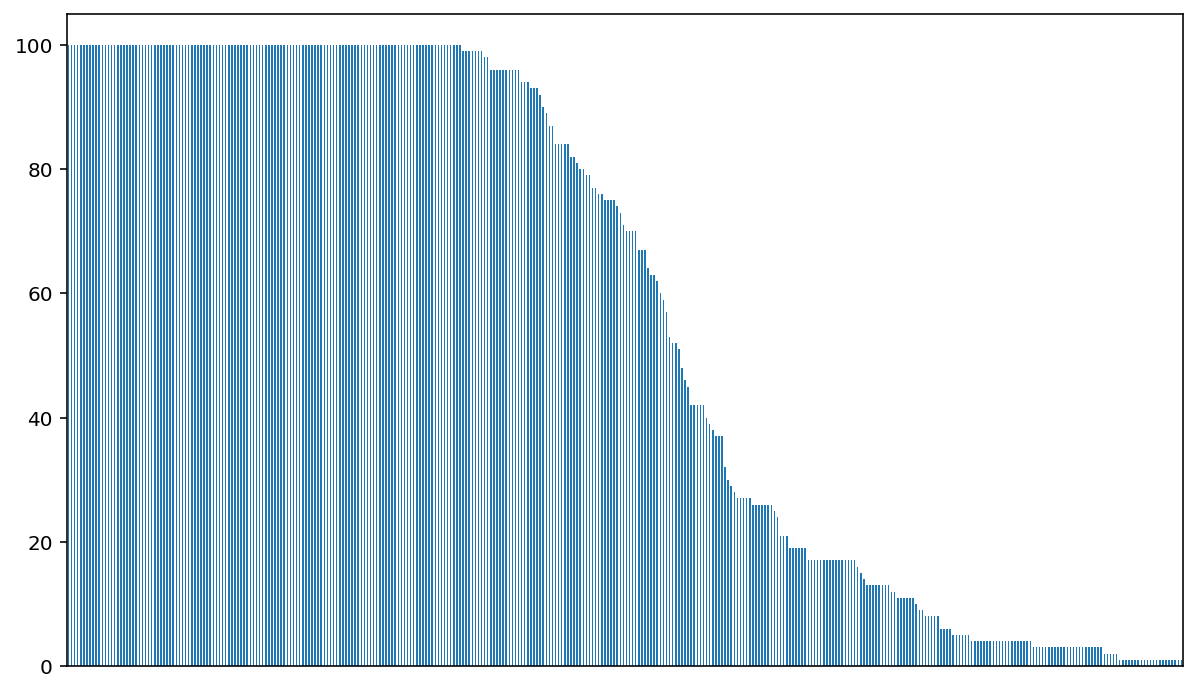

In [29]:
plt.figure(figsize=(10,10))
df_train_raw.cycle.value_counts().plot(kind='bar',figsize=(10,6))
plt.xticks([])
plt.show()

In [30]:
# 테스트 데이터
df_test_raw = pd.read_csv(path2, sep = ' ', header=None)
print(df_test_raw.shape)
df_test_raw.head()

(13096, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [31]:
# 26, 27 열 삭제
df_test_raw.drop([26,27], axis=1, inplace=True)
df_test_raw.columns = col_names
df_test_raw.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [32]:
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13096 non-null  int64  
 1   cycle     13096 non-null  int64  
 2   setting1  13096 non-null  float64
 3   setting2  13096 non-null  float64
 4   setting3  13096 non-null  float64
 5   s1        13096 non-null  float64
 6   s2        13096 non-null  float64
 7   s3        13096 non-null  float64
 8   s4        13096 non-null  float64
 9   s5        13096 non-null  float64
 10  s6        13096 non-null  float64
 11  s7        13096 non-null  float64
 12  s8        13096 non-null  float64
 13  s9        13096 non-null  float64
 14  s10       13096 non-null  float64
 15  s11       13096 non-null  float64
 16  s12       13096 non-null  float64
 17  s13       13096 non-null  float64
 18  s14       13096 non-null  float64
 19  s15       13096 non-null  float64
 20  s16       13096 non-null  fl

- 100개의 엔진이 있고 사이클 값은 1 ~ 303이다. 단, 여기서는 고장 시점을 알려주는 것은 아니다.
- 실제 고장 시점까진의 사이클 시간, remaining cycles before failure (time to failure, TTF)는 별도의 정답 파일에 들어 있다.

In [33]:
# 정답 파일 읽기
df_truth = pd.read_csv(path3, sep = ' ', header=None)
df_truth.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [34]:
# 불필요한 두번 째 컬럼 삭제, 컬럼 이름을 ttf로
df_truth.drop([1], axis=1, inplace=True)
df_truth.columns = ['ttf']
df_truth.head()

,ttf
0,112
1,98
2,69
3,82
4,91


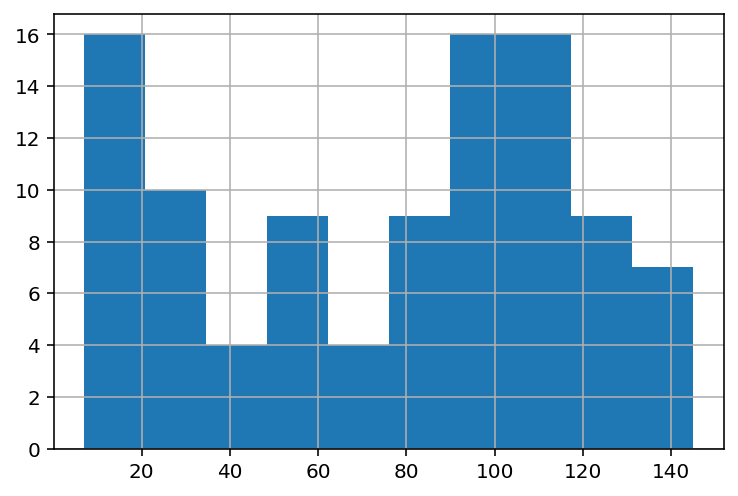

In [35]:
df_truth.ttf.hist(bins=10)

# 레이블 컬럼 추가

In [36]:
def prepare_train_data (df_in, period):

    # 각 엔진에 대해서 마지막 사이클 값을 저장하는 데이터 프레임 생성
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0, inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']
    
    # time-to-failure ttf 을 새로운 컬러에 기록 (회귀 레이블)
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
    df_in.drop(['last_cycle'], axis=1, inplace=True)
    
    # 이진 분류 레이블 작성
    df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    # 다중 분류 레이블 작성
    df_in['label_mcc'] = df_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)
    
    return df_in
    

- 테스트 데이터에 대해서 회귀레이블과 분류 데이블을 추가

In [37]:
def prepare_test_data(df_test_in, df_truth_in, period):
    
    df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())
    
    df_tst_last_cycle.reset_index(level=0, inplace=True)
    df_tst_last_cycle.columns = ['id', 'last_cycle']
    
    df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')


    df_test_in = df_test_in[df_test_in['cycle'] == df_test_in['last_cycle']]
    df_test_in.drop(['last_cycle'], axis=1, inplace=True)
    df_test_in.reset_index(drop=True, inplace=True)
    df_test_in = pd.concat([df_test_in, df_truth], axis=1)
    
    #create binary classification label
    df_test_in['label_bnc'] = df_test_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_test_in['label_mcc'] = df_test_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

    return df_test_in

## 분류 기준
- 이진 분류: 30 사이클 이내에 고장 여부
- 다중 분류: 30 사이클 이내 및 15 사이클 이내 고장 여부


In [38]:
# 각 엔진에 대해서 마지막 사이클 값을 저장하는 데이터 프레임 생성
df_in, period = df_train_raw, 30
df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
df_max_cycle

,cycle
id,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


In [39]:
df_max_cycle.reset_index(level=0, inplace=True)
df_max_cycle.columns = ['id', 'last_cycle']
df_max_cycle[:10]

,id,last_cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
5,6,188
6,7,259
7,8,150
8,9,201
9,10,222


In [40]:
df_max_cycle.last_cycle.values.mean() # 평균 수명

206.31

In [77]:
# time-to-failure ttf 을 새로운 컬럼에 기록 (회귀 레이블)
df_in = pd.merge(df_in, df_max_cycle, on='id')
df_in[:2]

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s16,s17,s18,s19,s20,s21,ttf,label_bnc,label_mcc,last_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.03,392,2388,100.0,39.06,23.4190,191,0,0,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.03,392,2388,100.0,39.00,23.4236,190,0,0,192


In [78]:
df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
df_in.drop(['last_cycle'], axis=1, inplace=True)
df_in[:2]

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0,0


In [43]:
# 이진 분류 레이블 작성
df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)

# 다중 분류 레이블 작성
df_in['label_mcc'] = df_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

In [44]:
# df_train = prepare_train_data (df_train_fx, 30)
df_train = df_in
print(df_train.shape)
df_train.head()

(20631, 29)


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0,0


## 전처리된 훈련 데이터 저장

In [31]:
df_train.to_csv('PM_train_pre.csv', index=False)

## 테스트 데이터 처리

In [61]:
df_test_in, df_truth_in, period = df_test_raw, df_truth, 30
    
df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())
df_tst_last_cycle[:10]

,cycle
id,
1,31
2,49
3,126
4,106
5,98
6,105
7,160
8,166
9,55


In [62]:
df_tst_last_cycle.cycle.values.sum() # 총 샘플수

13096

In [63]:
df_tst_last_cycle.cycle.values # 기록된 데이터 중 최대 사이클 수

array([ 31,  49, 126, 106,  98, 105, 160, 166,  55, 192,  83, 217, 195,
        46,  76, 113, 165, 133, 135, 184, 148,  39, 130, 186,  48,  76,
       140, 158, 171, 143, 196, 145,  50, 203, 198, 126, 121, 125,  37,
       133, 123, 156, 172,  54, 152, 146,  73,  78, 303,  74, 144, 189,
       164, 121, 113, 136, 160, 176,  94, 147, 159, 232, 155, 168,  71,
       147,  71, 187,  54, 152,  68, 131, 112, 137,  88, 205, 162,  72,
       101, 133, 213, 162,  73, 172,  34, 110,  56,  68, 177, 146, 234,
       150, 244, 133,  89,  97, 134, 121,  97, 198])

In [64]:
df_truth.ttf.values # 실제 수명

array([112,  98,  69,  82,  91,  93,  91,  95, 111,  96,  97, 124,  95,
       107,  83,  84,  50,  28,  87,  16,  57, 111, 113,  20, 145, 119,
        66,  97,  90, 115,   8,  48, 106,   7,  11,  19,  21,  50, 142,
        28,  18,  10,  59, 109, 114,  47, 135,  92,  21,  79, 114,  29,
        26,  97, 137,  15, 103,  37, 114, 100,  21,  54,  72,  28, 128,
        14,  77,   8, 121,  94, 118,  50, 131, 126, 113,  10,  34, 107,
        63,  90,   8,   9, 137,  58, 118,  89, 116, 115, 136,  28,  38,
        20,  85,  55, 128, 137,  82,  59, 117,  20])

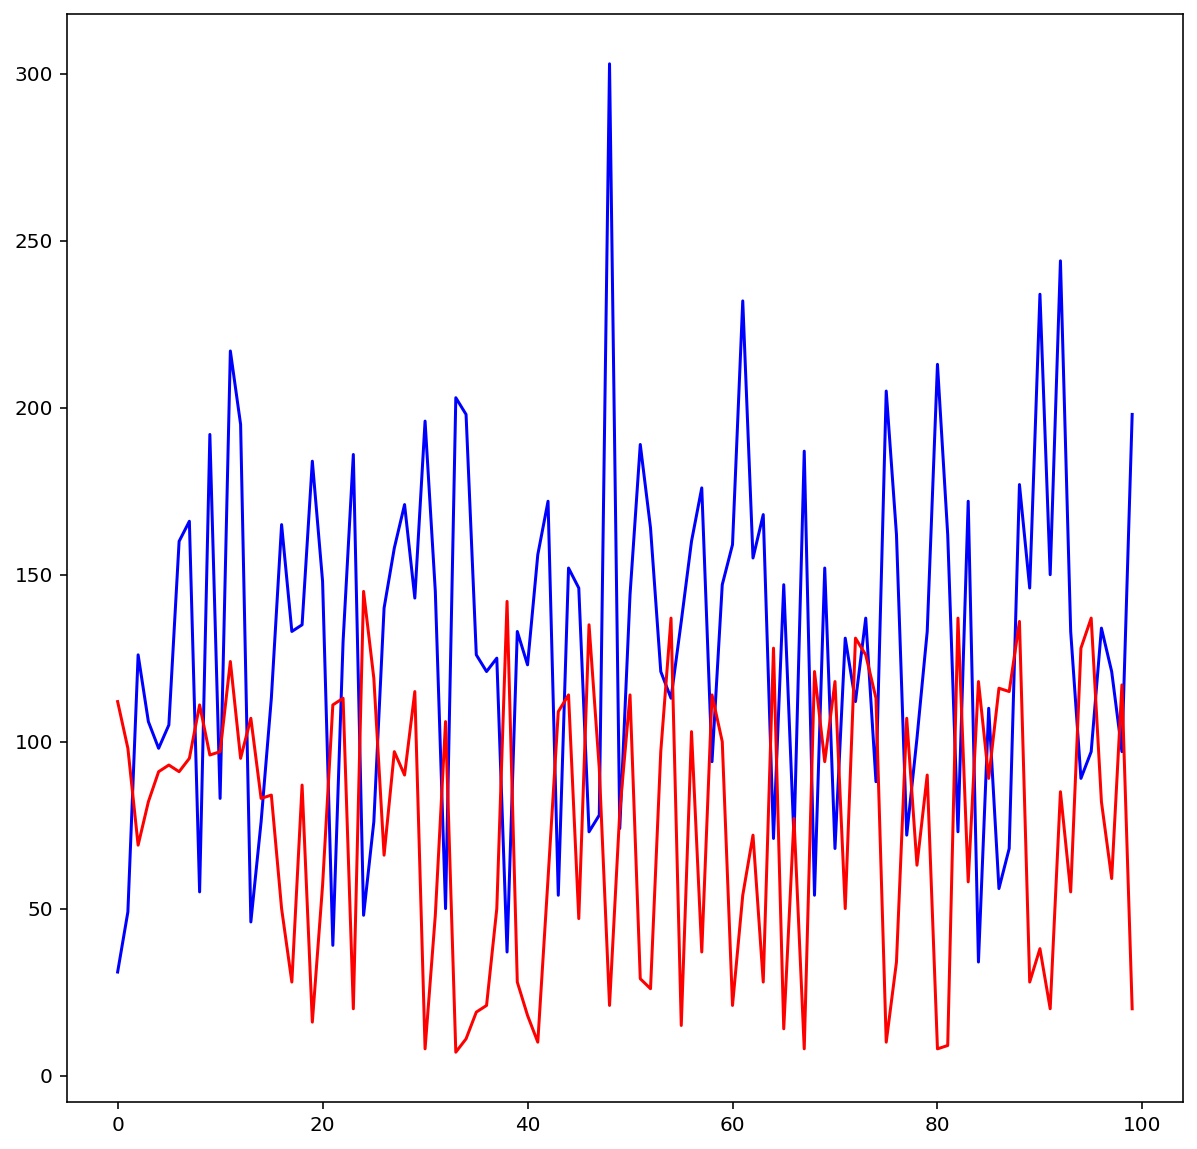

In [65]:
plt.figure(figsize=(10,10))
plt.plot(df_tst_last_cycle.cycle.values, c='b')
plt.plot(df_truth.ttf.values, c='r')
# plt.plot(df_tst_last_cycle.cycle.values+df_truth.ttf.values, c='k')

In [66]:
test_ttf = df_tst_last_cycle.cycle.values+df_truth.ttf.values

In [67]:
test_ttf.mean() # 테스트 데이터의 평균 수명

206.48

In [68]:
df_tst_last_cycle['last_cycle'] = test_ttf
df_tst_last_cycle[:10]

,cycle,last_cycle
id,,
1,31,143
2,49,147
3,126,195
4,106,188
5,98,189
6,105,198
7,160,251
8,166,261
9,55,166


In [69]:
df_tst_last_cycle.drop(["cycle"], axis=1, inplace = True)

In [70]:
df_tst_last_cycle[:5]

,last_cycle
id,
1,143
2,147
3,195
4,188
5,189


In [71]:
df_test_in[:5]

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [72]:
df_tst_last_cycle.reset_index(level=0, inplace=True)
df_tst_last_cycle.columns = ['id', 'last_cycle']
df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')
df_test_in['ttf'] = df_test_in['last_cycle'] - df_test_in['cycle']
df_test_in[:5]

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,last_cycle,ttf
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,143,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,143,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,143,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,143,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,143,138


In [73]:
df_test_in.shape

(13096, 28)

In [74]:
df_test_in.drop(['last_cycle'], axis=1, inplace=True)
df_test_in[:5]

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138


## 레이블 추가

In [75]:
#create binary classification label
df_test_in['label_bnc'] = df_test_in['ttf'].apply(lambda x: 1 if x <= period else 0)

#create multi-class classification label
df_test_in['label_mcc'] = df_test_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

In [76]:
# 분류를 위한 레이블 추가, 고장 시점은 'ttf' 컬럼에 저장

print(df_test_in.shape)
df_test_in.head()

(13096, 29)


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc,label_mcc
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,142,0,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,141,0,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,140,0,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,139,0,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,138,0,0


## 전처리된 테스트 데이터 저장

In [48]:
df_test_in.to_csv('PM_test_pre.csv', index=False)